In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\sigan\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [102]:

data= data.sample(frac=1)

fraud_data= data.loc[data['Class'] == 1]
no_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data= pd.concat([fraud_data, no_fraud_data])

data = normal_distributed_data.sample(frac=1, random_state=42)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hrs
119466,75455.0,-0.832757,0.723793,1.556898,-1.304189,0.564000,-0.313753,0.928103,0.033233,-0.765745,...,0.232433,-0.378386,0.128009,0.503589,1.027027,-0.068378,0.022133,10.30,0,20.959722
238366,149640.0,0.754316,2.379822,-5.137274,3.818392,0.043203,-1.285451,-1.766684,0.756711,-1.765722,...,0.141165,0.171985,0.394274,-0.444642,-0.263189,0.304703,-0.044362,2.00,1,41.566667
55858,47158.0,-0.663060,1.704549,1.206750,2.613358,0.138952,0.252322,0.214939,0.500171,-1.579208,...,-0.635883,-0.039027,-0.496884,-0.270745,0.013441,0.254117,0.126513,9.02,0,13.099444
84543,60353.0,-3.975216,0.581573,-1.880372,4.319241,-3.024330,1.240793,-1.909559,0.660718,-2.752611,...,1.397311,1.045322,-0.304000,0.005295,0.235435,0.962015,-0.673557,454.82,1,16.764722
149600,91554.0,-5.100256,3.633442,-3.843919,0.183208,-1.183997,1.602139,-3.005953,-8.645038,1.285458,...,-2.797150,1.090707,-0.159260,0.532156,-0.497126,0.943622,0.553581,261.22,1,25.431667


In [6]:
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, RandomForestClassifier 
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from hyperopt import hp, tpe, STATUS_OK, fmin, Trials
%matplotlib inline

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

data = pd.read_csv(r"C:\Users\sigan\Downloads\creditcard.csv")

y = data.Amount

melb_predictors = data.drop(['Amount'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [50]:
def split_data(df, drop_list):
    data = data.drop(drop_list,axis=1)
    print(df.columns)

    from sklearn.model_selection import train_test_split
    y = df['Class'].values
    X = df.drop(['Class'],axis=1).values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [59]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [66]:
def get_predictions(clf, X_train, y_train, X_test):
    clf = clf
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

In [64]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))


In [65]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(data, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class',
       'Time_Hrs'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[226216   1235]
 [   136    258]]
test-set confusion matrix:
 [[56521   343]
 [   31    67]]
recall score:  0.6836734693877551
precision score:  0.16341463414634147
f1 score:  0.2637795275590551
accuracy score:  0.9934342193040975
ROC AUC: 0.9685664255854283


In [71]:
drop_list = ['Amount','Time','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(data, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hrs'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[224026   3425]
 [    61    333]]
test-set confusion matrix:
 [[55951   913]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08608608608608609
f1 score:  0.15679124886052873
accuracy score:  0.983761103893824
ROC AUC: 0.9620274618710737


Time 
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hrs, dtype: float64


Text(0, 0.5, 'Transactions')

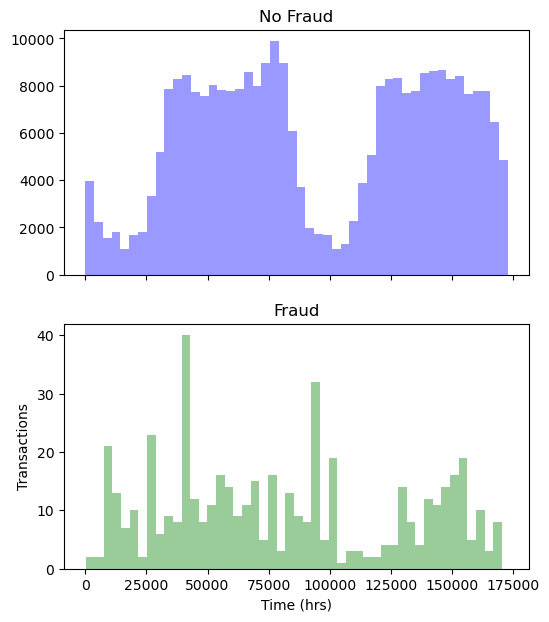

In [42]:
print("Time ")
data["Time_Hrs"] = data["Time"]/3600 
print(data["Time_Hrs"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,7))
ax1.hist(data.Time[data.Class==0],bins=48,color='b',alpha=0.4)
ax1.set_title('No Fraud')
ax2.hist(data.Time[data.Class==1],bins=48,color='g',alpha=0.4)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('Transactions')

Text(0, 0.5, 'Transactions')

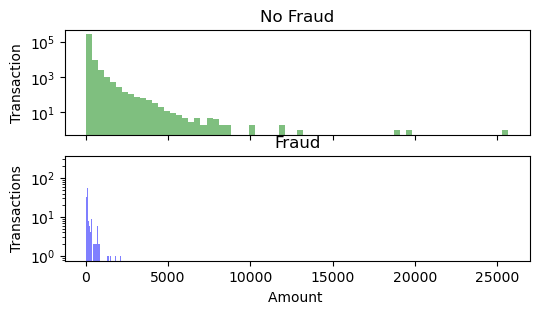

In [49]:

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(data.Amount[data.Class==0],bins=70,color='g',alpha=0.5)
ax3.set_yscale('log') 
ax3.set_title('No Fraud')
ax3.set_ylabel('Transaction')
ax4.hist(data.Amount[data.Class==1],bins=70,color='b',alpha=0.5)
ax4.set_yscale('log') 
ax4.set_title('Fraud') 
ax4.set_xlabel('Amount ')
ax4.set_ylabel('Transactions')

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

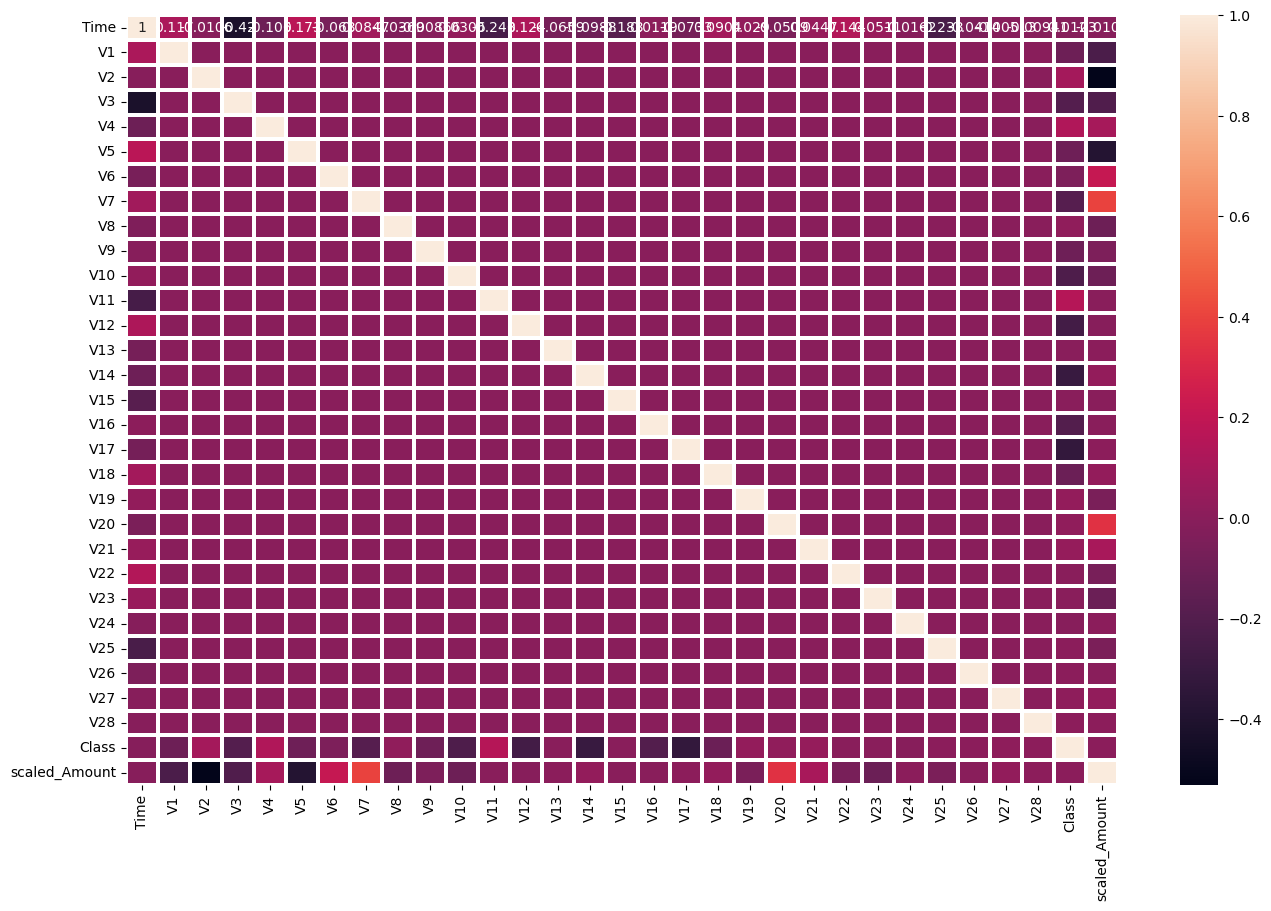

In [70]:
plt.figure(figsize = (16, 10))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.3g', linewidth = 1.5)
plt.show()

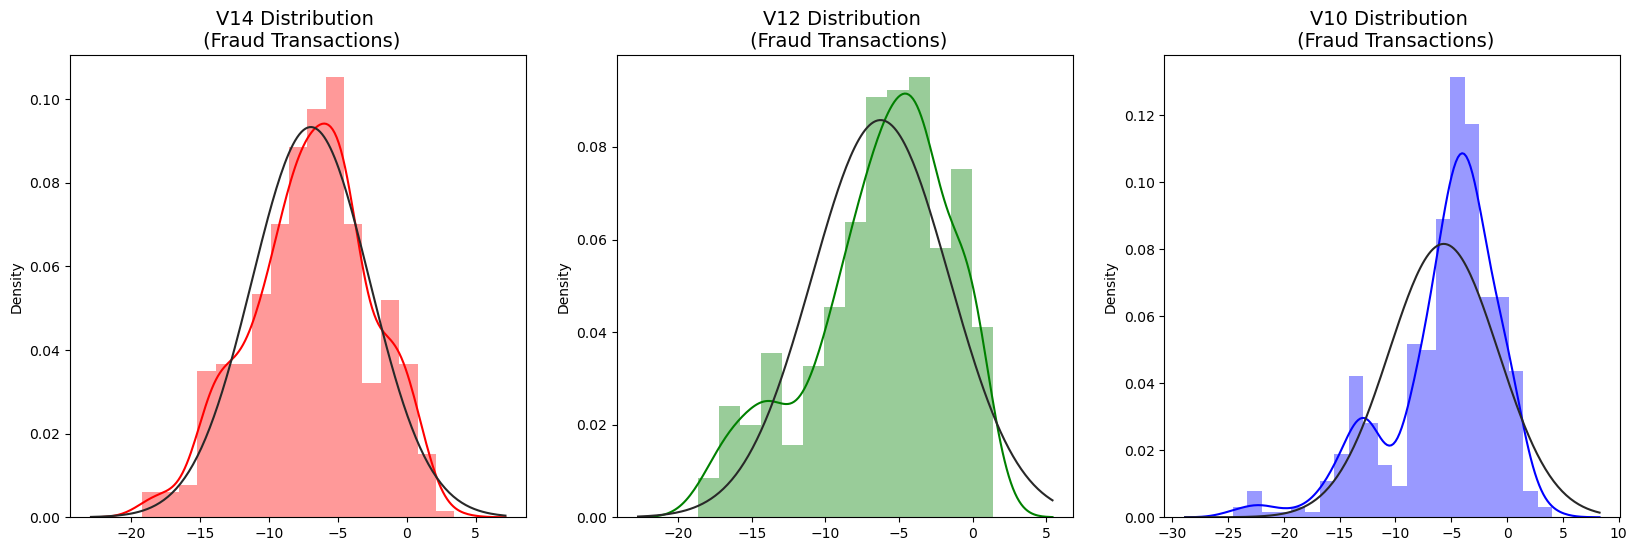

In [85]:
from scipy.stats import norm
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = data['V14'].loc[data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='red')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = data['V12'].loc[data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='green')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = data['V10'].loc[data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='blue')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

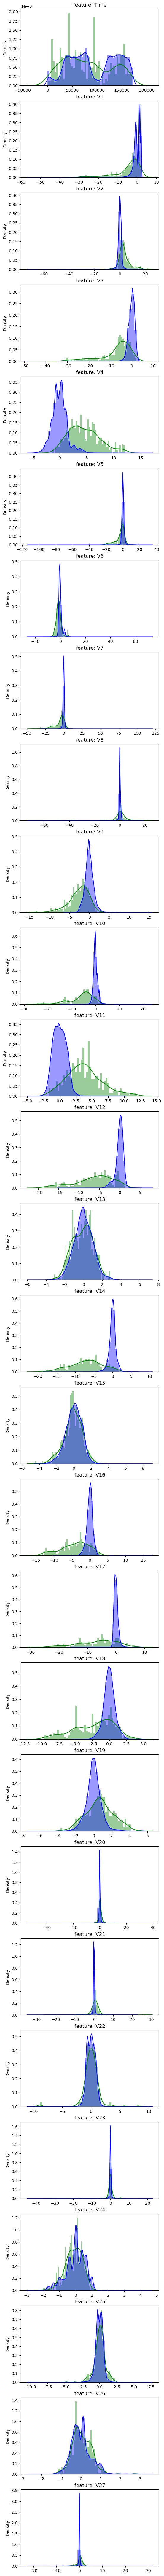

In [112]:
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='g')
    sns.distplot(df[col][df.Class == 0], bins=50, color='b')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [37]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("No Fraud")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

No Fraud
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
%matplotlib inline

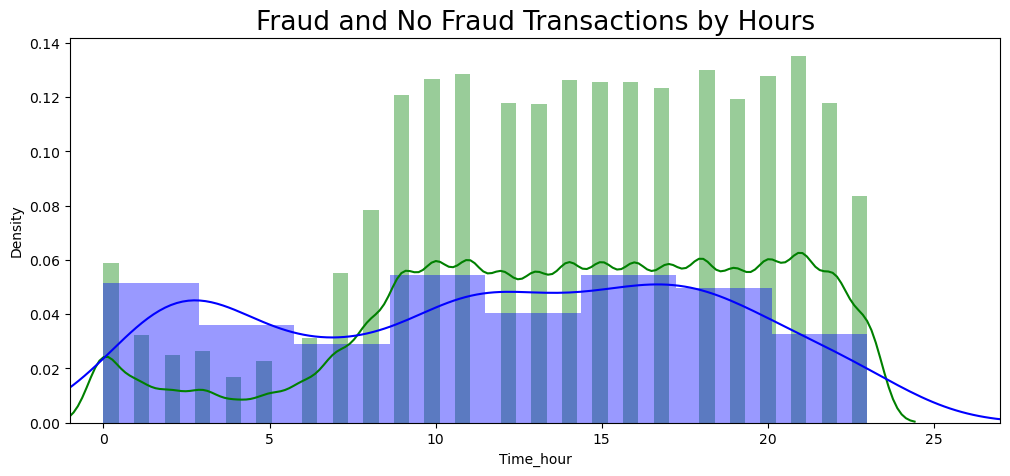

In [106]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='b')
plt.title('Fraud and No Fraud Transactions by Hours', fontsize=19)
plt.xlim([-1,27])
plt.show()

In [68]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [10]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

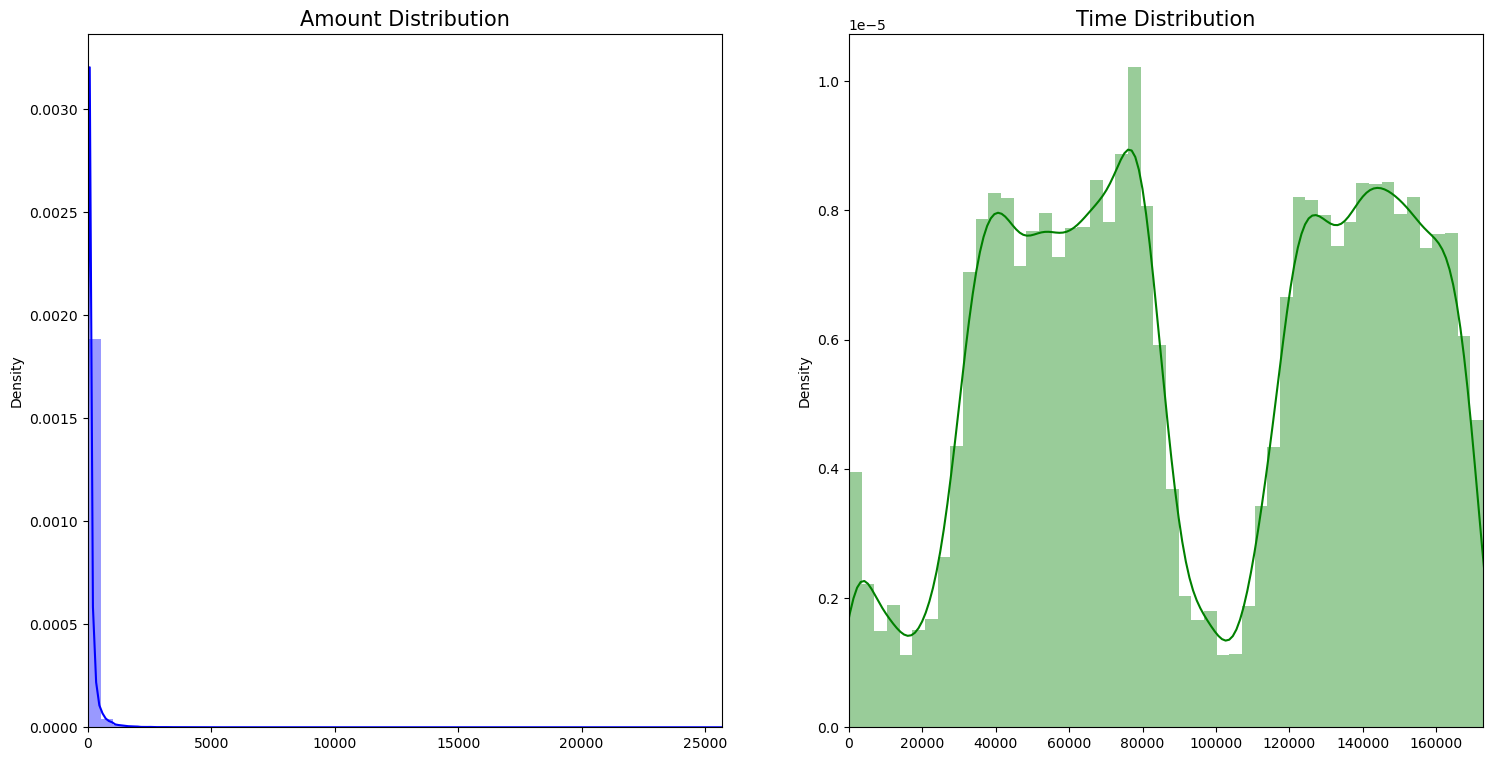

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,9))
amount_val = df['Amount'].values
time_val = df['Time'].values
sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Amount Distribution', fontsize=15)
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Time Distribution', fontsize=15)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

Class:


Text(0, 0.5, '')

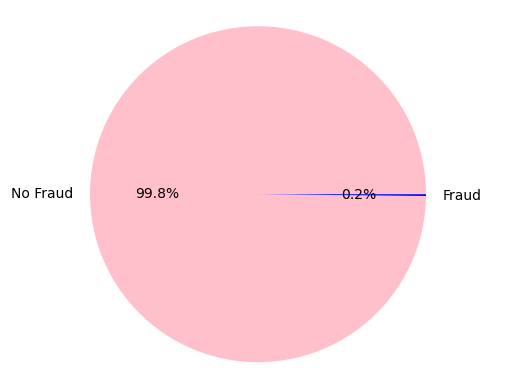

In [29]:
print("Class:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['No Fraud','Fraud'], colors=['pink','b'])
plt.axis('equal')
plt.ylabel('')

In [115]:
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [121]:
from scipy.stats import multivariate_normal

mu = data.drop('Class', axis=1).mean(axis=0).values
sigma = data.drop('Class', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

print(np.median(model.logpdf(data[data['Class'] == 0].drop('Class', axis=1).values))) 
print(np.median(model.logpdf(data[data['Class'] == 1].drop('Class', axis=1).values))) 

-51.44293322971153
-55.06537517877156
